I am writing a Python code to extract the positive or negative mood expressed in the New York Times article.

Please express how much positivity or negativity is demonstrated in this article. The outcome should be printed in the scale of 0 to 5 where 5 means most positive, favorable or optimistic attitude expressed and 0 means most negative, unfavorable or gloomy attitude expressed.

Data Source:

The New York Times Article will be found at https://www.nytimes.com/2017/01/26/arts/dance/rehearse-ice-feet-repeat-the-life-of-a-new-york-city-ballet-corps-dancer.html (Links to an external site.)

- You can download this article as an html or you can also convert into a flat text file and then you need to write your program to read from the file and show the result.

In [0]:
pip install inscriptis==0.0.3.2

  Created wheel for inscriptis: filename=inscriptis-0.0.3.2-cp36-none-any.whl size=9373 sha256=c21dd1964dd1315f745d39277c864654f9aa144e0c782b79ca7e6b5501be9a96
  Stored in directory: /root/.cache/pip/wheels/df/1e/5d/a95fde23bb1f9dee6b4d4d22d4542c80ee603a5a6a9ca82118
Successfully built inscriptis


In [0]:
import urllib.request
from inscriptis import get_text
from IPython.display import IFrame
import numpy as np
import pandas as pd 
import nltk 

url = "https://www.nytimes.com/2017/01/26/arts/dance/rehearse-ice-feet-repeat-the-life-of-a-new-york-city-ballet-corps-dancer.html"
html = urllib.request.urlopen(url).read().decode('utf8')

text = get_text(html)
reformatted_text = text.replace("!@#$%^&*()[]{};:,./<>?\|`~-=_+“", " ")

Further Reshape the text and Split the text into sentences

In [0]:
text_series = pd.Series([text])
datafile_array = np.array(text_series.str.split("\n", n = 320, expand = True))

In [0]:
datafile = pd.DataFrame(datafile_array.reshape(-1,1))
datafile.columns = ["TextDetails"]

Now We filter out blanks and unwanted rows

In [0]:
datafile = datafile[datafile['TextDetails'].map(len) > 50].reset_index()
Filtered_datafile = pd.DataFrame(datafile['TextDetails'])

In [0]:
Filtered_datafile['TextDetails'][0]

'Dance|Rehearse, Ice Feet, Repeat: The Life of a New York City Ballet Corps Dancer'

In [0]:
Filtered_datafile.shape[0]

35

Explore the DataFrame

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

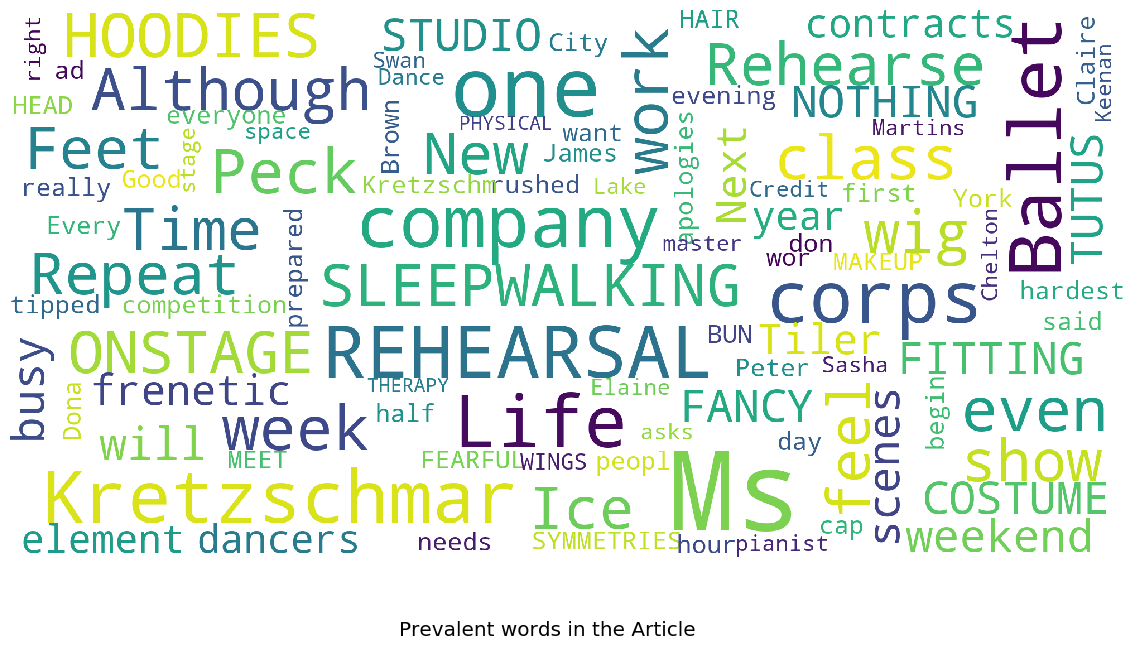

In [0]:
show_wordcloud(Filtered_datafile['TextDetails'].sample(35), title = 'Prevalent words in the Article')

Define Positive Set and Negative Set

In [0]:
#Positive Set
#http://ptrckprry.com/course/ssd/data/positive-words.txt
Positive_Set = set(['a+','abound','abounds','abundance','abundant','accessable','accessible','acclaim','acclaimed','acclamation','accolade','accolades',
                    'accommodative','accomodative','accomplish','accomplished','accomplishment','accomplishments','accurate','accurately','achievable',
                    'achievement','achievements','achievible','acumen','adaptable','adaptive','adequate','adjustable','admirable','admirably','admiration',
                    'admire','admirer','admiring','admiringly','adorable','adore','adored','adorer','adoring','adoringly','adroit','adroitly','adulate',
                    'adulation','adulatory','advanced','advantage','advantageous','advantageously','advantages','adventuresome','adventurous','advocate',
                    'advocated','advocates','affability','affable','affably','affectation','affection','affectionate','affinity','affirm','affirmation',
                    'affirmative','affluence','affluent','afford','affordable','affordably','afordable','agile','agilely','agility','agreeable',
                    'agreeableness','agreeably','all-around','alluring','alluringly','altruistic','altruistically','amaze','amazed','amazement',
                    'amazes','amazing','amazingly','ambitious','ambitiously','ameliorate','amenable','amenity','amiability','amiabily','amiable',
                    'amicability','amicable','amicably','amity','ample','amply','amuse','amusing','amusingly','angel','angelic','apotheosis','appeal',
                    'appealing','applaud','appreciable','appreciate','appreciated','appreciates','appreciative','appreciatively','appropriate','approval',
                    'approve','ardent','ardently','ardor','articulate','aspiration','aspirations','aspire','assurance','assurances','assure','assuredly',
                    'assuring','astonish','astonished','astonishing','astonishingly','astonishment','astound','astounded','astounding','astoundingly',
                    'astutely','attentive','attraction','attractive','attractively','attune','audible','audibly','auspicious','authentic','authoritative',
                    'autonomous','available','aver','avid','avidly','award','awarded','awards','awe','awed','awesome','awesomely','awesomeness','awestruck',
                    'awsome','backbone','balanced','bargain','beauteous','beautiful','beautifullly','beautifully','beautify','beauty','beckon','beckoned',
                    'beckoning','beckons','believable','believeable','beloved','benefactor','beneficent','beneficial','beneficially','beneficiary','benefit',
                    'benefits','benevolence','benevolent','benifits','best','best-known','best-performing','best-selling','better','better-known',
                    'better-than-expected','beutifully','blameless','bless','blessing','bliss','blissful','blissfully','blithe','blockbuster','bloom',
                    'blossom','bolster','bonny','bonus','bonuses','boom','booming','boost','boundless','bountiful','brainiest','brainy','brand-new','brave',
                    'bravery','bravo','breakthrough','breakthroughs','breathlessness','breathtaking','breathtakingly','breeze','bright','brighten',
                    'brighter','brightest','brilliance','brilliances','brilliant','brilliantly','brisk','brotherly','bullish','buoyant','cajole','calm',
                    'calming','calmness','capability','capable','capably','captivate','captivating','carefree','cashback','cashbacks','catchy','celebrate',
                    'celebrated','celebration','celebratory','champ','champion','charisma','charismatic','charitable','charm','charming','charmingly',
                    'chaste','cheaper','cheapest','cheer','cheerful','cheery','cherish','cherished','cherub','chic','chivalrous','chivalry','civility',
                    'civilize','clarity','classic','classy','clean','cleaner','cleanest','cleanliness','cleanly','clear','clear-cut','cleared','clearer',
                    'clearly','clears','clever','cleverly','cohere','coherence','coherent','cohesive','colorful','comely','comfort','comfortable',
                    'comfortably','comforting','comfy','commend','commendable','commendably','commitment','commodious','compact','compactly','compassion',
                    'compassionate','compatible','competitive','complement','complementary','complemented','complements','compliant','compliment',
                    'complimentary','comprehensive','conciliate','conciliatory','concise','confidence','confident','congenial','congratulate',
                    'congratulation','congratulations','congratulatory','conscientious','considerate','consistent','consistently','constructive',
                    'consummate','contentment','continuity','contrasty','contribution','convenience','convenient','conveniently','convience','convienient',
                    'convient','convincing','convincingly','cool','coolest','cooperative','cooperatively','cornerstone','correct','correctly',
                    'cost-effective','cost-saving','counter-attack','counter-attacks','courage','courageous','courageously','courageousness','courteous',
                    'courtly','covenant','cozy','creative','credence','credible','crisp','crisper','cure','cure-all','cushy','cute','cuteness','danke',
                    'danken','daring','daringly','darling','dashing','dauntless','dawn','dazzle','dazzled','dazzling','dead-cheap','dead-on','decency',
                    'decent','decisive','decisiveness','dedicated','defeat','defeated','defeating','defeats','defender','deference','deft','deginified',
                    'delectable','delicacy','delicate','delicious','delight','delighted','delightful','delightfully','delightfulness','dependable',
                    'dependably','deservedly','deserving','desirable','desiring','desirous','destiny','detachable','devout','dexterous','dexterously',
                    'dextrous','dignified','dignify','dignity','diligence','diligent','diligently','diplomatic','dirt-cheap','distinction','distinctive',
                    'distinguished','diversified','divine','divinely','dominate','dominated','dominates','dote','dotingly','doubtless','dreamland',
                    'dumbfounded','dumbfounding','dummy-proof','durable','dynamic','eager','eagerly','eagerness','earnest','earnestly','earnestness',
                    'ease','eased','eases','easier','easiest','easiness','easing','easy','easy-to-use','easygoing','ebullience','ebullient','ebulliently',
                    'ecenomical','economical','ecstasies','ecstasy','ecstatic','ecstatically','edify','educated','effective','effectively','effectiveness',
                    'effectual','efficacious','efficient','efficiently','effortless','effortlessly','effusion','effusive','effusively','effusiveness','elan',
                    'elate','elated','elatedly','elation','electrify','elegance','elegant','elegantly','elevate','elite','eloquence','eloquent','eloquently',
                    'embolden','eminence','eminent','empathize','empathy','empower','empowerment','enchant','enchanted','enchanting','enchantingly',
                    'encourage','encouragement','encouraging','encouragingly','endear','endearing','endorse','endorsed','endorsement','endorses','endorsing',
                    'energetic','energize','energy-efficient','energy-saving','engaging','engrossing','enhance','enhanced','enhancement','enhances','enjoy',
                    'enjoyable','enjoyably','enjoyed','enjoying','enjoyment','enjoys','enlighten','enlightenment','enliven','ennoble','enough','enrapt',
                    'enrapture','enraptured','enrich','enrichment','enterprising','entertain','entertaining','entertains','enthral','enthrall','enthralled',
                    'enthuse','enthusiasm','enthusiast','enthusiastic','enthusiastically','entice','enticed','enticing','enticingly','entranced','entrancing',
                    'entrust','enviable','enviably','envious','enviously','enviousness','envy','equitable','ergonomical','err-free','erudite','ethical',
                    'eulogize','euphoria','euphoric','euphorically','evaluative','evenly','eventful','everlasting','evocative','exalt','exaltation','exalted',
                    'exaltedly','exalting','exaltingly','examplar','examplary','excallent','exceed','exceeded','exceeding','exceedingly','exceeds','excel',
                    'exceled','excelent','excellant','excelled','excellence','excellency','excellent','excellently','excels','exceptional','exceptionally',
                    'excite','excited','excitedly','excitedness','excitement','excites','exciting','excitingly','exellent','exemplar','exemplary','exhilarate',
                    'exhilarating','exhilaratingly','exhilaration','exonerate','expansive','expeditiously','expertly','exquisite','exquisitely','extol',
                    'extoll','extraordinarily','extraordinary','exuberance','exuberant','exuberantly','exult','exultant','exultation','exultingly','eye-catch',
                    'eye-catching','eyecatch','eyecatching','fabulous','fabulously','facilitate','fair','fairly','fairness','faith','faithful','faithfully',
                    'faithfulness','fame','famed','famous','famously','fancier','fancinating','fancy','fanfare','fans','fantastic','fantastically','fascinate',
                    'fascinating','fascinatingly','fascination','fashionable','fashionably','fast','fast-growing','fast-paced','faster','fastest',
                    'fastest-growing','faultless','fav','fave','favor','favorable','favored','favorite','favorited','favour','fearless','fearlessly','feasible',
                    'feasibly','feat','feature-rich','fecilitous','feisty','felicitate','felicitous','felicity','fertile','fervent','fervently','fervid',
                    'fervidly','fervor','festive','fidelity','fiery','fine','fine-looking','finely','finer','finest','firmer','first-class','first-in-class',
                    'first-rate','flashy','flatter','flattering','flatteringly','flawless','flawlessly','flexibility','flexible','flourish','flourishing',
                    'fluent','flutter','fond','fondly','fondness','foolproof','foremost','foresight','formidable','fortitude','fortuitous','fortuitously',
                    'fortunate','fortunately','fortune','fragrant','free','freed','freedom','freedoms','fresh','fresher','freshest','friendliness','friendly',
                    'frolic','frugal','fruitful','ftw','fulfillment','fun','futurestic','futuristic','gaiety','gaily','gain','gained','gainful','gainfully',
                    'gaining','gains','gallant','gallantly','galore','geekier','geeky','gem','gems','generosity','generous','generously','genial','genius',
                    'gentle','gentlest','genuine','gifted','glad','gladden','gladly','gladness','glamorous','glee','gleeful','gleefully','glimmer','glimmering',
                    'glisten','glistening','glitter','glitz','glorify','glorious','gloriously','glory','glow','glowing','glowingly','god-given','god-send',
                    'godlike','godsend','gold','golden','good','goodly','goodness','goodwill','goood','gooood','gorgeous','gorgeously','grace','graceful',
                    'gracefully','gracious','graciously','graciousness','grand','grandeur','grateful','gratefully','gratification','gratified','gratifies',
                    'gratify','gratifying','gratifyingly','gratitude','great','greatest','greatness','grin','groundbreaking','guarantee','guidance','guiltless',
                    'gumption','gush','gusto','gutsy','hail','halcyon','hale','hallmark','hallmarks','hallowed','handier','handily','hands-down','handsome',
                    'handsomely','handy','happier','happily','happiness','happy','hard-working','hardier','hardy','harmless','harmonious','harmoniously',
                    'harmonize','harmony','headway','heal','healthful','healthy','hearten','heartening','heartfelt','heartily','heartwarming','heaven',
                    'heavenly','helped','helpful','helping','hero','heroic','heroically','heroine','heroize','heros','high-quality','high-spirited','hilarious',
                    'holy','homage','honest','honesty','honor','honorable','honored','honoring','hooray','hopeful','hospitable','hot','hotcake','hotcakes',
                    'hottest','hug','humane','humble','humility','humor','humorous','humorously','humour','humourous','ideal','idealize','ideally','idol',
                    'idolize','idolized','idyllic','illuminate','illuminati','illuminating','illumine','illustrious','ilu','imaculate','imaginative',
                    'immaculate','immaculately','immense','impartial','impartiality','impartially','impassioned','impeccable','impeccably','important',
                    'impress','impressed','impresses','impressive','impressively','impressiveness','improve','improved','improvement','improvements',
                    'improves','improving','incredible','incredibly','indebted','individualized','indulgence','indulgent','industrious','inestimable',
                    'inestimably','inexpensive','infallibility','infallible','infallibly','influential','ingenious','ingeniously','ingenuity','ingenuous',
                    'ingenuously','innocuous','innovation','innovative','inpressed','insightful','insightfully','inspiration','inspirational','inspire',
                    'inspiring','instantly','instructive','instrumental','integral','integrated','intelligence','intelligent','intelligible','interesting',
                    'interests','intimacy','intimate','intricate','intrigue','intriguing','intriguingly','intuitive','invaluable','invaluablely','inventive',
                    'invigorate','invigorating','invincibility','invincible','inviolable','inviolate','invulnerable','irreplaceable','irreproachable',
                    'irresistible','irresistibly','issue-free','jaw-droping','jaw-dropping','jollify','jolly','jovial','joy','joyful','joyfully','joyous',
                    'joyously','jubilant','jubilantly','jubilate','jubilation','jubiliant','judicious','justly','keen','keenly','keenness','kid-friendly',
                    'kindliness','kindly','kindness','knowledgeable','kudos','large-capacity','laud','laudable','laudably','lavish','lavishly','law-abiding',
                    'lawful','lawfully','lead','leading','leads','lean','led','legendary','leverage','levity','liberate','liberation','liberty','lifesaver',
                    'light-hearted','lighter','likable','like','liked','likes','liking','lionhearted','lively','logical','long-lasting','lovable','lovably',
                    'love','loved','loveliness','lovely','lover','loves','loving','low-cost','low-price','low-priced','low-risk','lower-priced','loyal',
                    'loyalty','lucid','lucidly','luck','luckier','luckiest','luckiness','lucky','lucrative','luminous','lush','luster','lustrous','luxuriant',
                    'luxuriate','luxurious','luxuriously','luxury','lyrical','magic','magical','magnanimous','magnanimously','magnificence','magnificent',
                    'magnificently','majestic','majesty','manageable','maneuverable','marvel','marveled','marvelled','marvellous','marvelous','marvelously',
                    'marvelousness','marvels','master','masterful','masterfully','masterpiece','masterpieces','masters','mastery','matchless','mature',
                    'maturely','maturity','meaningful','memorable','merciful','mercifully','mercy','merit','meritorious','merrily','merriment','merriness',
                    'merry','mesmerize','mesmerized','mesmerizes','mesmerizing','mesmerizingly','meticulous','meticulously','mightily','mighty','mind-blowing',
                    'miracle','miracles','miraculous','miraculously','miraculousness','modern','modest','modesty','momentous','monumental','monumentally',
                    'morality','motivated','multi-purpose','navigable','neat','neatest','neatly','nice','nicely','nicer','nicest','nifty','nimble','noble',
                    'nobly','noiseless','non-violence','non-violent','notably','noteworthy','nourish','nourishing','nourishment','novelty','nurturing','oasis',
                    'obsession','obsessions','obtainable','openly','openness','optimal','optimism','optimistic','opulent','orderly','originality','outdo',
                    'outdone','outperform','outperformed','outperforming','outperforms','outshine','outshone','outsmart','outstanding','outstandingly',
                    'outstrip','outwit','ovation','overjoyed','overtake','overtaken','overtakes','overtaking','overtook','overture','pain-free','painless',
                    'painlessly','palatial','pamper','pampered','pamperedly','pamperedness','pampers','panoramic','paradise','paramount','pardon','passion',
                    'passionate','passionately','patience','patient','patiently','patriot','patriotic','peace','peaceable','peaceful','peacefully',
                    'peacekeepers','peach','peerless','pep','pepped','pepping','peppy','peps','perfect','perfection','perfectly','permissible','perseverance',
                    'persevere','personages','personalized','phenomenal','phenomenally','picturesque','piety','pinnacle','playful','playfully','pleasant',
                    'pleasantly','pleased','pleases','pleasing','pleasingly','pleasurable','pleasurably','pleasure','plentiful','pluses','plush','plusses',
                    'poetic','poeticize','poignant','poise','poised','polished','polite','politeness','popular','portable','posh','positive','positively',
                    'positives','powerful','powerfully','praise','praiseworthy','praising','pre-eminent','precious','precise','precisely','preeminent',
                    'prefer','preferable','preferably','prefered','preferes','preferring','prefers','premier','prestige','prestigious','prettily','pretty',
                    'priceless','pride','principled','privilege','privileged','prize','proactive','problem-free','problem-solver','prodigious','prodigiously',
                    'prodigy','productive','productively','proficient','proficiently','profound','profoundly','profuse','profusion','progress','progressive',
                    'prolific','prominence','prominent','promise','promised','promises','promising','promoter','prompt','promptly','proper','properly',
                    'propitious','propitiously','pros','prosper','prosperity','prosperous','prospros','protect','protection','protective','proud','proven',
                    'proves','providence','proving','prowess','prudence','prudent','prudently','punctual','pure','purify','purposeful','quaint','qualified',
                    'qualify','quicker','quiet','quieter','radiance','radiant','rapid','rapport','rapt','rapture','raptureous','raptureously','rapturous',
                    'rapturously','rational','razor-sharp','reachable','readable','readily','ready','reaffirm','reaffirmation','realistic','realizable',
                    'reasonable','reasonably','reasoned','reassurance','reassure','receptive','reclaim','recomend','recommend','recommendation',
                    'recommendations','recommended','reconcile','reconciliation','record-setting','recover','recovery','rectification','rectify',
                    'rectifying','redeem','redeeming','redemption','refine','refined','refinement','reform','reformed','reforming','reforms','refresh',
                    'refreshed','refreshing','refund','refunded','regal','regally','regard','rejoice','rejoicing','rejoicingly','rejuvenate','rejuvenated',
                    'rejuvenating','relaxed','relent','reliable','reliably','relief','relish','remarkable','remarkably','remedy','remission','remunerate',
                    'renaissance','renewed','renown','renowned','replaceable','reputable','reputation','resilient','resolute','resound','resounding',
                    'resourceful','resourcefulness','respect','respectable','respectful','respectfully','respite','resplendent','responsibly','responsive',
                    'restful','restored','restructure','restructured','restructuring','retractable','revel','revelation','revere','reverence','reverent',
                    'reverently','revitalize','revival','revive','revives','revolutionary','revolutionize','revolutionized','revolutionizes','reward',
                    'rewarding','rewardingly','rich','richer','richly','richness','right','righten','righteous','righteously','righteousness','rightful',
                    'rightfully','rightly','rightness','risk-free','robust','rock-star','rock-stars','rockstar','rockstars','romantic','romantically',
                    'romanticize','roomier','roomy','rosy','safe','safely','sagacity','sagely','saint','saintliness','saintly','salutary','salute','sane',
                    'satisfactorily','satisfactory','satisfied','satisfies','satisfy','satisfying','satisified','saver','savings','savior','savvy','scenic',
                    'seamless','seasoned','secure','securely','selective','self-determination','self-respect','self-satisfaction','self-sufficiency',
                    'self-sufficient','sensation','sensational','sensationally','sensations','sensible','sensibly','sensitive','serene','serenity','sexy',
                    'sharp','sharper','sharpest','shimmering','shimmeringly','shine','shiny','significant','silent','simpler','simplest','simplified',
                    'simplifies','simplify','simplifying','sincere','sincerely','sincerity','skill','skilled','skillful','skillfully','slammin','sleek',
                    'slick','smart','smarter','smartest','smartly','smile','smiles','smiling','smilingly','smitten','smooth','smoother','smoothes',
                    'smoothest','smoothly','snappy','snazzy','sociable','soft','softer','solace','solicitous','solicitously','solid','solidarity','soothe',
                    'soothingly','sophisticated','soulful','soundly','soundness','spacious','sparkle','sparkling','spectacular','spectacularly','speedily',
                    'speedy','spellbind','spellbinding','spellbindingly','spellbound','spirited','spiritual','splendid','splendidly','splendor','spontaneous',
                    'sporty','spotless','sprightly','stability','stabilize','stable','stainless','standout','state-of-the-art','stately','statuesque',
                    'staunch','staunchly','staunchness','steadfast','steadfastly','steadfastness','steadiest','steadiness','steady','stellar','stellarly',
                    'stimulate','stimulates','stimulating','stimulative','stirringly','straighten','straightforward','streamlined','striking','strikingly',
                    'striving','strong','stronger','strongest','stunned','stunning','stunningly','stupendous','stupendously','sturdier','sturdy','stylish',
                    'stylishly','stylized','suave','suavely','sublime','subsidize','subsidized','subsidizes','subsidizing','substantive','succeed','succeeded',
                    'succeeding','succeeds','succes','success','successes','successful','successfully','suffice','sufficed','suffices','sufficient',
                    'sufficiently','suitable','sumptuous','sumptuously','sumptuousness','super','superb','superbly','superior','superiority','supple','support',
                    'supported','supporter','supporting','supportive','supports','supremacy','supreme','supremely','supurb','supurbly','surmount','surpass',
                    'surreal','survival','survivor','sustainability','sustainable','swank','swankier','swankiest','swanky','sweeping','sweet','sweeten',
                    'sweetheart','sweetly','sweetness','swift','swiftness','talent','talented','talents','tantalize','tantalizing','tantalizingly',
                    'tempt','tempting','temptingly','tenacious','tenaciously','tenacity','tender','tenderly','terrific','terrifically','thank','thankful',
                    'thinner','thoughtful','thoughtfully','thoughtfulness','thrift','thrifty','thrill','thrilled','thrilling','thrillingly','thrills','thrive',
                    'thriving','thumb-up','thumbs-up','tickle','tidy','time-honored','timely','tingle','titillate','titillating','titillatingly','togetherness',
                    'tolerable','toll-free','top','top-notch','top-quality','topnotch','tops','tough','tougher','toughest','traction','tranquil','tranquility',
                    'transparent','treasure','tremendously','trendy','triumph','triumphal','triumphant','triumphantly','trivially','trophy','trouble-free',
                    'trump','trumpet','trust','trusted','trusting','trustingly','trustworthiness','trustworthy','trusty','truthful','truthfully','truthfulness',
                    'twinkly','ultra-crisp','unabashed','unabashedly','unaffected','unassailable','unbeatable','unbiased','unbound','uncomplicated',
                    'unconditional','undamaged','undaunted','understandable','undisputable','undisputably','undisputed','unencumbered','unequivocal',
                    'unequivocally','unfazed','unfettered','unforgettable','unity','unlimited','unmatched','unparalleled','unquestionable','unquestionably',
                    'unreal','unrestricted','unrivaled','unselfish','unwavering','upbeat','upgradable','upgradeable','upgraded','upheld','uphold','uplift',
                    'uplifting','upliftingly','upliftment','upscale','usable','useable','useful','user-friendly','user-replaceable','valiant','valiantly',
                    'valor','valuable','variety','venerate','verifiable','veritable','versatile','versatility','vibrant','vibrantly','victorious','victory',
                    'viewable','vigilance','vigilant','virtue','virtuous','virtuously','visionary','vivacious','vivid','vouch','vouchsafe','warm','warmer',
                    'warmhearted','warmly','warmth','wealthy','welcome','well','well-backlit','well-balanced','well-behaved','well-being','well-bred',
                    'well-connected','well-educated','well-established','well-informed','well-intentioned','well-known','well-made','well-managed',
                    'well-mannered','well-positioned','well-received','well-regarded','well-rounded','well-run','well-wishers','wellbeing','whoa',
                    'wholeheartedly','wholesome','whooa','whoooa','wieldy','willing','willingly','willingness','win','windfall','winnable','winner',
                    'winners','winning','wins','wisdom','wise','wisely','witty','won','wonder','wonderful','wonderfully','wonderous','wonderously','wonders',
                    'wondrous','woo','work','workable','worked','works','world-famous','worth','worth-while','worthiness','worthwhile','worthy','wow','wowed',
                    'wowing','wows','yay','youthful','zeal','zenith','zest','zippy'])

In [0]:
#http://ptrckprry.com/course/ssd/data/negative-words.txt
Negative_Set = set(['2-faced','2-faces','abnormal','abolish','abominable','abominably','abominate','abomination','abort','aborted','aborts','abrade',
                    'abrasive','abrupt','abruptly','abscond','absence','absent-minded','absentee','absurd','absurdity','absurdly','absurdness','abuse',
                    'abused','abuses','abusive','abysmal','abysmally','abyss','accidental','accost','accursed','accusation','accusations','accuse','accuses',
                    'accusing','accusingly','acerbate','acerbic','acerbically','ache','ached','aches','achey','aching','acrid','acridly','acridness',
                    'acrimonious','acrimoniously','acrimony','adamant','adamantly','addict','addicted','addicting','addicts','admonish','admonisher',
                    'admonishingly','admonishment','admonition','adulterate','adulterated','adulteration','adulterier','adversarial','adversary','adverse',
                    'adversity','afflict','affliction','afflictive','affront','afraid','aggravate','aggravating','aggravation','aggression','aggressive',
                    'aggressiveness','aggressor','aggrieve','aggrieved','aggrivation','aghast','agonies','agonize','agonizing','agonizingly','agony',
                    'aground','ail','ailing','ailment','aimless','alarm','alarmed','alarming','alarmingly','alienate','alienated','alienation','allegation',
                    'allegations','allege','allergic','allergies','allergy','aloof','altercation','ambiguity','ambiguous','ambivalence','ambivalent','ambush',
                    'amiss','amputate','anarchism','anarchist','anarchistic','anarchy','anemic','anger','angrily','angriness','angry','anguish','animosity',
                    'annihilate','annihilation','annoy','annoyance','annoyances','annoyed','annoying','annoyingly','annoys','anomalous','anomaly','antagonism',
                    'antagonist','antagonistic','antagonize','anti-','anti-american','anti-israeli','anti-occupation','anti-proliferation','anti-semites',
                    'anti-social','anti-us','anti-white','antipathy','antiquated','antithetical','anxieties','anxiety','anxious','anxiously','anxiousness',
                    'apathetic','apathetically','apathy','apocalypse','apocalyptic','apologist','apologists','appal','appall','appalled','appalling',
                    'appallingly','apprehension','apprehensions','apprehensive','apprehensively','arbitrary','arcane','archaic','arduous','arduously',
                    'argumentative','arrogance','arrogant','arrogantly','ashamed','asinine','asininely','asinininity','askance','asperse','aspersion',
                    'aspersions','assail','assassin','assassinate','assault','assult','astray','asunder','atrocious','atrocities','atrocity','atrophy',
                    'attack','attacks','audacious','audaciously','audaciousness','audacity','audiciously','austere','authoritarian','autocrat','autocratic',
                    'avalanche','avarice','avaricious','avariciously','avenge','averse','aversion','aweful','awful','awfully','awfulness','awkward',
                    'awkwardness','ax','babble','back-logged','back-wood','back-woods','backache','backaches','backaching','backbite','backbiting','backward',
                    'backwardness','backwood','backwoods','bad','badly','baffle','baffled','bafflement','baffling','bait','balk','banal','banalize','bane',
                    'banish','banishment','bankrupt','barbarian','barbaric','barbarically','barbarity','barbarous','barbarously','barren','baseless','bash',
                    'bashed','bashful','bashing','bastard','bastards','battered','battering','batty','bearish','beastly','bedlam','bedlamite','befoul','beg',
                    'beggar','beggarly','begging','beguile','belabor','belated','beleaguer','belie','belittle','belittled','belittling','bellicose',
                    'belligerence','belligerent','belligerently','bemoan','bemoaning','bemused','bent','berate','bereave','bereavement','bereft','berserk',
                    'beseech','beset','besiege','besmirch','bestial','betray','betrayal','betrayals','betrayer','betraying','betrays','bewail','beware',
                    'bewilder','bewildered','bewildering','bewilderingly','bewilderment','bewitch','bias','biased','biases','bicker','bickering','bid-rigging',
                    'bigotries','bigotry','bitch','bitchy','biting','bitingly','bitter','bitterly','bitterness','bizarre','blab','blabber','blackmail','blah',
                    'blame','blameworthy','bland','blandish','blaspheme','blasphemous','blasphemy','blasted','blatant','blatantly','blather','bleak','bleakly',
                    'bleakness','bleed','bleeding','bleeds','blemish','blind','blinding','blindingly','blindside','blister','blistering','bloated','blockage',
                    'blockhead','bloodshed','bloodthirsty','bloody','blotchy','blow','blunder','blundering','blunders','blunt','blur','bluring','blurred',
                    'blurring','blurry','blurs','blurt','boastful','boggle','bogus','boil','boiling','boisterous','bomb','bombard','bombardment','bombastic',
                    'bondage','bonkers','bore','bored','boredom','bores','boring','botch','bother','bothered','bothering','bothers','bothersome','bowdlerize',
                    'boycott','braggart','bragger','brainless','brainwash','brash','brashly','brashness','brat','bravado','brazen','brazenly','brazenness',
                    'breach','break','break-up','break-ups','breakdown','breaking','breaks','breakup','breakups','bribery','brimstone','bristle','brittle',
                    'broke','broken','broken-hearted','brood','browbeat','bruise','bruised','bruises','bruising','brusque','brutal','brutalising','brutalities',
                    'brutality','brutalize','brutalizing','brutally','brute','brutish','bs','buckle','bug','bugging','buggy','bugs','bulkier','bulkiness',
                    'bulky','bulkyness','bull****','bull----','bullies','bullshit','bullshyt','bully','bullying','bullyingly','bum','bump','bumped','bumping',
                    'bumpping','bumps','bumpy','bungle','bungler','bungling','bunk','burden','burdensome','burdensomely','burn','burned','burning','burns',
                    'bust','busts','busybody','butcher','butchery','buzzing','byzantine','cackle','calamities','calamitous','calamitously','calamity','callous',
                    'calumniate','calumniation','calumnies','calumnious','calumniously','calumny','cancer','cancerous','cannibal','cannibalize','capitulate',
                    'capricious','capriciously','capriciousness','capsize','careless','carelessness','caricature','carnage','carp','cartoonish','cash-strapped',
                    'castigate','castrated','casualty','cataclysm','cataclysmal','cataclysmic','cataclysmically','catastrophe','catastrophes','catastrophic',
                    'catastrophically','catastrophies','caustic','caustically','cautionary','cave','censure','chafe','chaff','chagrin','challenging','chaos',
                    'chaotic','chasten','chastise','chastisement','chatter','chatterbox','cheap','cheapen','cheaply','cheat','cheated','cheater','cheating',
                    'cheats','checkered','cheerless','cheesy','chide','childish','chill','chilly','chintzy','choke','choleric','choppy','chore','chronic',
                    'chunky','clamor','clamorous','clash','cliche','cliched','clique','clog','clogged','clogs','cloud','clouding','cloudy','clueless','clumsy',
                    'clunky','coarse','cocky','coerce','coercion','coercive','cold','coldly','collapse','collude','collusion','combative','combust','comical',
                    'commiserate','commonplace','commotion','commotions','complacent','complain','complained','complaining','complains','complaint','complaints',
                    'complex','complicated','complication','complicit','compulsion','compulsive','concede','conceded','conceit','conceited','concen','concens',
                    'concern','concerned','concerns','concession','concessions','condemn','condemnable','condemnation','condemned','condemns','condescend',
                    'condescending','condescendingly','condescension','confess','confession','confessions','confined','conflict','conflicted','conflicting',
                    'conflicts','confound','confounded','confounding','confront','confrontation','confrontational','confuse','confused','confuses','confusing',
                    'confusion','confusions','congested','congestion','cons','conscons','conservative','conspicuous','conspicuously','conspiracies','conspiracy',
                    'conspirator','conspiratorial','conspire','consternation','contagious','contaminate','contaminated','contaminates','contaminating',
                    'contamination','contempt','contemptible','contemptuous','contemptuously','contend','contention','contentious','contort','contortions',
                    'contradict','contradiction','contradictory','contrariness','contravene','contrive','contrived','controversial','controversy','convoluted',
                    'corrode','corrosion','corrosions','corrosive','corrupt','corrupted','corrupting','corruption','corrupts','corruptted','costlier','costly',
                    'counter-productive','counterproductive','coupists','covetous','coward','cowardly','crabby','crack','cracked','cracks','craftily','craftly',
                    'crafty','cramp','cramped','cramping','cranky','crap','crappy','craps','crash','crashed','crashes','crashing','crass','craven','cravenly',
                    'craze','crazily','craziness','crazy','creak','creaking','creaks','credulous','creep','creeping','creeps','creepy','crept','crime','criminal',
                    'cringe','cringed','cringes','cripple','crippled','cripples','crippling','crisis','critic','critical','criticism','criticisms','criticize',
                    'criticized','criticizing','critics','cronyism','crook','crooked','crooks','crowded','crowdedness','crude','cruel','crueler','cruelest',
                    'cruelly','cruelness','cruelties','cruelty','crumble','crumbling','crummy','crumple','crumpled','crumples','crush','crushed','crushing','cry',
                    'culpable','culprit','cumbersome','cunt','cunts','cuplrit','curse','cursed','curses','curt','cuss','cussed','cutthroat','cynical','cynicism',
                    'd*mn','damage','damaged','damages','damaging','damn','damnable','damnably','damnation','damned','damning','damper','danger','dangerous',
                    'dangerousness','dark','darken','darkened','darker','darkness','dastard','dastardly','daunt','daunting','dauntingly','dawdle','daze','dazed',
                    'dead','deadbeat','deadlock','deadly','deadweight','deaf','dearth','death','debacle','debase','debasement','debaser','debatable','debauch',
                    'debaucher','debauchery','debilitate','debilitating','debility','debt','debts','decadence','decadent','decay','decayed','deceit','deceitful',
                    'deceitfully','deceitfulness','deceive','deceiver','deceivers','deceiving','deception','deceptive','deceptively','declaim','decline',
                    'declines','declining','decrement','decrepit','decrepitude','decry','defamation','defamations','defamatory','defame','defect','defective',
                    'defects','defensive','defiance','defiant','defiantly','deficiencies','deficiency','deficient','defile','defiler','deform','deformed',
                    'defrauding','defunct','defy','degenerate','degenerately','degeneration','degradation','degrade','degrading','degradingly','dehumanization',
                    'dehumanize','deign','deject','dejected','dejectedly','dejection','delay','delayed','delaying','delays','delinquency','delinquent','delirious',
                    'delirium','delude','deluded','deluge','delusion','delusional','delusions','demean','demeaning','demise','demolish','demolisher','demon',
                    'demonic','demonize','demonized','demonizes','demonizing','demoralize','demoralizing','demoralizingly','denial','denied','denies','denigrate',
                    'denounce','dense','dent','dented','dents','denunciate','denunciation','denunciations','deny','denying','deplete','deplorable','deplorably',
                    'deplore','deploring','deploringly','deprave','depraved','depravedly','deprecate','depress','depressed','depressing','depressingly',
                    'depression','depressions','deprive','deprived','deride','derision','derisive','derisively','derisiveness','derogatory','desecrate','desert',
                    'desertion','desiccate','desiccated','desititute','desolate','desolately','desolation','despair','despairing','despairingly','desperate',
                    'desperately','desperation','despicable','despicably','despise','despised','despoil','despoiler','despondence','despondency','despondent',
                    'despondently','despot','despotic','despotism','destabilisation','destains','destitute','destitution','destroy','destroyer','destruction',
                    'destructive','desultory','deter','deteriorate','deteriorating','deterioration','deterrent','detest','detestable','detestably','detested',
                    'detesting','detests','detract','detracted','detracting','detraction','detracts','detriment','detrimental','devastate','devastated',
                    'devastates','devastating','devastatingly','devastation','deviate','deviation','devil','devilish','devilishly','devilment','devilry','devious',
                    'deviously','deviousness','devoid','diabolic','diabolical','diabolically','diametrically','diappointed','diatribe','diatribes','dick','dictator',
                    'dictatorial','die','die-hard','died','dies','difficult','difficulties','difficulty','diffidence','dilapidated','dilemma','dilly-dally','dim',
                    'dimmer','din','ding','dings','dinky','dire','direly','direness','dirt','dirtbag','dirtbags','dirts','dirty','disable','disabled','disaccord',
                    'disadvantage','disadvantaged','disadvantageous','disadvantages','disaffect','disaffected','disaffirm','disagree','disagreeable','disagreeably',
                    'disagreed','disagreeing','disagreement','disagrees','disallow','disapointed','disapointing','disapointment','disappoint','disappointed',
                    'disappointing','disappointingly','disappointment','disappointments','disappoints','disapprobation','disapproval','disapprove','disapproving',
                    'disarm','disarray','disaster','disasterous','disastrous','disastrously','disavow','disavowal','disbelief','disbelieve','disbeliever','disclaim',
                    'discombobulate','discomfit','discomfititure','discomfort','discompose','disconcert','disconcerted','disconcerting','disconcertingly',
                    'disconsolate','disconsolately','disconsolation','discontent','discontented','discontentedly','discontinued','discontinuity','discontinuous',
                    'discord','discordance','discordant','discountenance','discourage','discouragement','discouraging','discouragingly','discourteous',
                    'discourteously','discoutinous','discredit','discrepant','discriminate','discrimination','discriminatory','disdain','disdained','disdainful',
                    'disdainfully','disfavor','disgrace','disgraced','disgraceful','disgracefully','disgruntle','disgruntled','disgust','disgusted','disgustedly',
                    'disgustful','disgustfully','disgusting','disgustingly','dishearten','disheartening','dishearteningly','dishonest','dishonestly','dishonesty',
                    'dishonor','dishonorable','dishonorablely','disillusion','disillusioned','disillusionment','disillusions','disinclination','disinclined',
                    'disingenuous','disingenuously','disintegrate','disintegrated','disintegrates','disintegration','disinterest','disinterested','dislike',
                    'disliked','dislikes','disliking','dislocated','disloyal','disloyalty','dismal','dismally','dismalness','dismay','dismayed','dismaying',
                    'dismayingly','dismissive','dismissively','disobedience','disobedient','disobey','disoobedient','disorder','disordered','disorderly',
                    'disorganized','disorient','disoriented','disown','disparage','disparaging','disparagingly','dispensable','dispirit','dispirited','dispiritedly',
                    'dispiriting','displace','displaced','displease','displeased','displeasing','displeasure','disproportionate','disprove','disputable','dispute',
                    'disputed','disquiet','disquieting','disquietingly','disquietude','disregard','disregardful','disreputable','disrepute','disrespect',
                    'disrespectable','disrespectablity','disrespectful','disrespectfully','disrespectfulness','disrespecting','disrupt','disruption','disruptive',
                    'diss','dissapointed','dissappointed','dissappointing','dissatisfaction','dissatisfactory','dissatisfied','dissatisfies','dissatisfy',
                    'dissatisfying','dissed','dissemble','dissembler','dissension','dissent','dissenter','dissention','disservice','disses','dissidence','dissident',
                    'dissidents','dissing','dissocial','dissolute','dissolution','dissonance','dissonant','dissonantly','dissuade','dissuasive','distains','distaste',
                    'distasteful','distastefully','distort','distorted','distortion','distorts','distract','distracting','distraction','distraught','distraughtly',
                    'distraughtness','distress','distressed','distressing','distressingly','distrust','distrustful','distrusting','disturb','disturbance','disturbed',
                    'disturbing','disturbingly','disunity','disvalue','divergent','divisive','divisively','divisiveness','dizzing','dizzingly','dizzy','doddering',
                    'dodgey','dogged','doggedly','dogmatic','doldrums','domineer','domineering','donside','doom','doomed','doomsday','dope','doubt','doubtful','doubtfully',
                    'doubts','douchbag','douchebag','douchebags','downbeat','downcast','downer','downfall','downfallen','downgrade','downhearted','downheartedly','downhill',
                    'downside','downsides','downturn','downturns','drab','draconian','draconic','drag','dragged','dragging','dragoon','drags','drain','drained','draining',
                    'drains','drastic','drastically','drawback','drawbacks','dread','dreadful','dreadfully','dreadfulness','dreary','dripped','dripping','drippy','drips',
                    'drones','droop','droops','drop-out','drop-outs','dropout','dropouts','drought','drowning','drunk','drunkard','drunken','dubious','dubiously','dubitable',
                    'dud','dull','dullard','dumb','dumbfound','dump','dumped','dumping','dumps','dunce','dungeon','dungeons','dupe','dust','dusty','dwindling','dying',
                    'earsplitting','eccentric','eccentricity','effigy','effrontery','egocentric','egomania','egotism','egotistical','egotistically','egregious','egregiously',
                    'election-rigger','elimination','emaciated','emasculate','embarrass','embarrassing','embarrassingly','embarrassment','embattled','embroil','embroiled',
                    'embroilment','emergency','emphatic','emphatically','emptiness','encroach','encroachment','endanger','enemies','enemy','enervate','enfeeble','enflame',
                    'engulf','enjoin','enmity','enrage','enraged','enraging','enslave','entangle','entanglement','entrap','entrapment','envious','enviously','enviousness',
                    'epidemic','equivocal','erase','erode','erodes','erosion','err','errant','erratic','erratically','erroneous','erroneously','error','errors','eruptions',
                    'escapade','eschew','estranged','evade','evasion','evasive','evil','evildoer','evils','eviscerate','exacerbate','exagerate','exagerated','exagerates',
                    'exaggerate','exaggeration','exasperate','exasperated','exasperating','exasperatingly','exasperation','excessive','excessively','exclusion','excoriate',
                    'excruciating','excruciatingly','excuse','excuses','execrate','exhaust','exhausted','exhaustion','exhausts','exhorbitant','exhort','exile','exorbitant',
                    'exorbitantance','exorbitantly','expel','expensive','expire','expired','explode','exploit','exploitation','explosive','expropriate','expropriation',
                    'expulse','expunge','exterminate','extermination','extinguish','extort','extortion','extraneous','extravagance','extravagant','extravagantly','extremism',
                    'extremist','extremists','eyesore','f**k','fabricate','fabrication','facetious','facetiously','fail','failed','failing','fails','failure','failures',
                    'faint','fainthearted','faithless','fake','fall','fallacies','fallacious','fallaciously','fallaciousness','fallacy','fallen','falling','fallout','falls',
                    'FALSE','falsehood','falsely','falsify','falter','faltered','famine','famished','fanatic','fanatical','fanatically','fanaticism','fanatics','fanciful',
                    'far-fetched','farce','farcical','farcical-yet-provocative','farcically','farfetched','fascism','fascist','fastidious','fastidiously','fastuous','fat',
                    'fat-cat','fat-cats','fatal','fatalistic','fatalistically','fatally','fatcat','fatcats','fateful','fatefully','fathomless','fatigue','fatigued','fatique',
                    'fatty','fatuity','fatuous','fatuously','fault','faults','faulty','fawningly','faze','fear','fearful','fearfully','fears','fearsome','feckless','feeble',
                    'feeblely','feebleminded','feign','feint','fell','felon','felonious','ferociously','ferocity','fetid','fever','feverish','fevers','fiasco','fib','fibber',
                    'fickle','fiction','fictional','fictitious','fidget','fidgety','fiend','fiendish','fierce','figurehead','filth','filthy','finagle','finicky','fissures',
                    'fist','flabbergast','flabbergasted','flagging','flagrant','flagrantly','flair','flairs','flak','flake','flakey','flakieness','flaking','flaky','flare',
                    'flares','flareup','flareups','flat-out','flaunt','flaw','flawed','flaws','flee','fleed','fleeing','fleer','flees','fleeting','flicering','flicker',
                    'flickering','flickers','flighty','flimflam','flimsy','flirt','flirty','floored','flounder','floundering','flout','fluster','foe','fool','fooled',
                    'foolhardy','foolish','foolishly','foolishness','forbid','forbidden','forbidding','forceful','foreboding','forebodingly','forfeit','forged','forgetful',
                    'forgetfully','forgetfulness','forlorn','forlornly','forsake','forsaken','forswear','foul','foully','foulness','fractious','fractiously','fracture',
                    'fragile','fragmented','frail','frantic','frantically','franticly','fraud','fraudulent','fraught','frazzle','frazzled','freak','freaking','freakish',
                    'freakishly','freaks','freeze','freezes','freezing','frenetic','frenetically','frenzied','frenzy','fret','fretful','frets','friction','frictions','fried',
                    'friggin','frigging','fright','frighten','frightening','frighteningly','frightful','frightfully','frigid','frost','frown','froze','frozen','fruitless',
                    'fruitlessly','frustrate','frustrated','frustrates','frustrating','frustratingly','frustration','frustrations','fuck','fucking','fudge','fugitive',
                    'full-blown','fulminate','fumble','fume','fumes','fundamentalism','funky','funnily','funny','furious','furiously','furor','fury','fuss','fussy','fustigate',
                    'fusty','futile','futilely','futility','fuzzy','gabble','gaff','gaffe','gainsay','gainsayer','gall','galling','gallingly','galls','gangster','gape',
                    'garbage','garish','gasp','gauche','gaudy','gawk','gawky','geezer','genocide','get-rich','ghastly','ghetto','ghosting','gibber','gibberish','gibe','giddy',
                    'gimmick','gimmicked','gimmicking','gimmicks','gimmicky','glare','glaringly','glib','glibly','glitch','glitches','gloatingly','gloom','gloomy','glower',
                    'glum','glut','gnawing','goad','goading','god-awful','goof','goofy','goon','gossip','graceless','gracelessly','graft','grainy','grapple','grate','grating',
                    'gravely','greasy','greed','greedy','grief','grievance','grievances','grieve','grieving','grievous','grievously','grim','grimace','grind','gripe','gripes',
                    'grisly','gritty','gross','grossly','grotesque','grouch','grouchy','groundless','grouse','growl','grudge','grudges','grudging','grudgingly','gruesome',
                    'gruesomely','gruff','grumble','grumpier','grumpiest','grumpily','grumpish','grumpy','guile','guilt','guiltily','guilty','gullible','gutless','gutter',
                    'hack','hacks','haggard','haggle','hairloss','halfhearted','halfheartedly','hallucinate','hallucination','hamper','hampered','handicapped','hang','hangs',
                    'haphazard','hapless','harangue','harass','harassed','harasses','harassment','harboring','harbors','hard','hard-hit','hard-line','hard-liner','hardball',
                    'harden','hardened','hardheaded','hardhearted','hardliner','hardliners','hardship','hardships','harm','harmed','harmful','harms','harpy','harridan',
                    'harried','harrow','harsh','harshly','hasseling','hassle','hassled','hassles','haste','hastily','hasty','hate','hated','hateful','hatefully','hatefulness',
                    'hater','haters','hates','hating','hatred','haughtily','haughty','haunt','haunting','havoc','hawkish','haywire','hazard','hazardous','haze','hazy',
                    'head-aches','headache','headaches','heartbreaker','heartbreaking','heartbreakingly','heartless','heathen','heavy-handed','heavyhearted','heck','heckle',
                    'heckled','heckles','hectic','hedge','hedonistic','heedless','hefty','hegemonism','hegemonistic','hegemony','heinous','hell','hell-bent','hellion','hells',
                    'helpless','helplessly','helplessness','heresy','heretic','heretical','hesitant','hestitant','hideous','hideously','hideousness','high-priced','hiliarious',
                    'hinder','hindrance','hiss','hissed','hissing','ho-hum','hoard','hoax','hobble','hogs','hollow','hoodium','hoodwink','hooligan','hopeless','hopelessly',
                    'hopelessness','horde','horrendous','horrendously','horrible','horrid','horrific','horrified','horrifies','horrify','horrifying','horrifys','hostage',
                    'hostile','hostilities','hostility','hotbeds','hothead','hotheaded','hothouse','hubris','huckster','hum','humid','humiliate','humiliating','humiliation',
                    'humming','hung','hurt','hurted','hurtful','hurting','hurts','hustler','hype','hypocricy','hypocrisy','hypocrite','hypocrites','hypocritical',
                    'hypocritically','hysteria','hysteric','hysterical','hysterically','hysterics','idiocies','idiocy','idiot','idiotic','idiotically','idiots','idle','ignoble',
                    'ignominious','ignominiously','ignominy','ignorance','ignorant','ignore','ill-advised','ill-conceived','ill-defined','ill-designed','ill-fated',
                    'ill-favored','ill-formed','ill-mannered','ill-natured','ill-sorted','ill-tempered','ill-treated','ill-treatment','ill-usage','ill-used','illegal',
                    'illegally','illegitimate','illicit','illiterate','illness','illogic','illogical','illogically','illusion','illusions','illusory','imaginary','imbalance',
                    'imbecile','imbroglio','immaterial','immature','imminence','imminently','immobilized','immoderate','immoderately','immodest','immoral','immorality',
                    'immorally','immovable','impair','impaired','impasse','impatience','impatient','impatiently','impeach','impedance','impede','impediment','impending',
                    'impenitent','imperfect','imperfection','imperfections','imperfectly','imperialist','imperil','imperious','imperiously','impermissible','impersonal',
                    'impertinent','impetuous','impetuously','impiety','impinge','impious','implacable','implausible','implausibly','implicate','implication','implode',
                    'impolite','impolitely','impolitic','importunate','importune','impose','imposers','imposing','imposition','impossible','impossiblity','impossibly',
                    'impotent','impoverish','impoverished','impractical','imprecate','imprecise','imprecisely','imprecision','imprison','imprisonment','improbability',
                    'improbable','improbably','improper','improperly','impropriety','imprudence','imprudent','impudence','impudent','impudently','impugn','impulsive',
                    'impulsively','impunity','impure','impurity','inability','inaccuracies','inaccuracy','inaccurate','inaccurately','inaction','inactive','inadequacy',
                    'inadequate','inadequately','inadverent','inadverently','inadvisable','inadvisably','inane','inanely','inappropriate','inappropriately','inapt','inaptitude',
                    'inarticulate','inattentive','inaudible','incapable','incapably','incautious','incendiary','incense','incessant','incessantly','incite','incitement',
                    'incivility','inclement','incognizant','incoherence','incoherent','incoherently','incommensurate','incomparable','incomparably','incompatability',
                    'incompatibility','incompatible','incompetence','incompetent','incompetently','incomplete','incompliant','incomprehensible','incomprehension',
                    'inconceivable','inconceivably','incongruous','incongruously','inconsequent','inconsequential','inconsequentially','inconsequently','inconsiderate',
                    'inconsiderately','inconsistence','inconsistencies','inconsistency','inconsistent','inconsolable','inconsolably','inconstant','inconvenience',
                    'inconveniently','incorrect','incorrectly','incorrigible','incorrigibly','incredulous','incredulously','inculcate','indecency','indecent','indecently',
                    'indecision','indecisive','indecisively','indecorum','indefensible','indelicate','indeterminable','indeterminably','indeterminate','indifference',
                    'indifferent','indigent','indignant','indignantly','indignation','indignity','indiscernible','indiscreet','indiscreetly','indiscretion','indiscriminate',
                    'indiscriminately','indiscriminating','indistinguishable','indoctrinate','indoctrination','indolent','indulge','ineffective','ineffectively',
                    'ineffectiveness','ineffectual','ineffectually','ineffectualness','inefficacious','inefficacy','inefficiency','inefficient','inefficiently','inelegance',
                    'inelegant','ineligible','ineloquent','ineloquently','inept','ineptitude','ineptly','inequalities','inequality','inequitable','inequitably','inequities',
                    'inescapable','inescapably','inessential','inevitable','inevitably','inexcusable','inexcusably','inexorable','inexorably','inexperience','inexperienced',
                    'inexpert','inexpertly','inexpiable','inexplainable','inextricable','inextricably','infamous','infamously','infamy','infected','infection','infections',
                    'inferior','inferiority','infernal','infest','infested','infidel','infidels','infiltrator','infiltrators','infirm','inflame','inflammation','inflammatory',
                    'inflammed','inflated','inflationary','inflexible','inflict','infraction','infringe','infringement','infringements','infuriate','infuriated','infuriating',
                    'infuriatingly','inglorious','ingrate','ingratitude','inhibit','inhibition','inhospitable','inhospitality','inhuman','inhumane','inhumanity','inimical',
                    'inimically','iniquitous','iniquity','injudicious','injure','injurious','injury','injustice','injustices','innuendo','inoperable','inopportune','inordinate',
                    'inordinately','insane','insanely','insanity','insatiable','insecure','insecurity','insensible','insensitive','insensitively','insensitivity','insidious',
                    'insidiously','insignificance','insignificant','insignificantly','insincere','insincerely','insincerity','insinuate','insinuating','insinuation',
                    'insociable','insolence','insolent','insolently','insolvent','insouciance','instability','instable','instigate','instigator','instigators','insubordinate',
                    'insubstantial','insubstantially','insufferable','insufferably','insufficiency','insufficient','insufficiently','insular','insult','insulted','insulting',
                    'insultingly','insults','insupportable','insupportably','insurmountable','insurmountably','insurrection','intefere','inteferes','intense','interfere',
                    'interference','interferes','intermittent','interrupt','interruption','interruptions','intimidate','intimidating','intimidatingly','intimidation',
                    'intolerable','intolerablely','intolerance','intoxicate','intractable','intransigence','intransigent','intrude','intrusion','intrusive','inundate',
                    'inundated','invader','invalid','invalidate','invalidity','invasive','invective','inveigle','invidious','invidiously','invidiousness','invisible',
                    'involuntarily','involuntary','irascible','irate','irately','ire','irk','irked','irking','irks','irksome','irksomely','irksomeness','irksomenesses','ironic',
                    'ironical','ironically','ironies','irony','irragularity','irrational','irrationalities','irrationality','irrationally','irrationals','irreconcilable',
                    'irrecoverable','irrecoverableness','irrecoverablenesses','irrecoverably','irredeemable','irredeemably','irreformable','irregular','irregularity',
                    'irrelevance','irrelevant','irreparable','irreplacible','irrepressible','irresolute','irresolvable','irresponsible','irresponsibly','irretating',
                    'irretrievable','irreversible','irritable','irritably','irritant','irritate','irritated','irritating','irritation','irritations','isolate','isolated',
                    'isolation','issue','issues','itch','itching','itchy','jabber','jaded','jagged','jam','jarring','jaundiced','jealous','jealously','jealousness','jealousy',
                    'jeer','jeering','jeeringly','jeers','jeopardize','jeopardy','jerk','jerky','jitter','jitters','jittery','job-killing','jobless','joke','joker','jolt',
                    'judder','juddering','judders','jumpy','junk','junky','junkyard','jutter','jutters','kaput','kill','killed','killer','killing','killjoy','kills','knave',
                    'knife','knock','knotted','kook','kooky','lack','lackadaisical','lacked','lackey','lackeys','lacking','lackluster','lacks','laconic','lag','lagged',
                    'lagging','laggy','lags','laid-off','lambast','lambaste','lame','lame-duck','lament','lamentable','lamentably','languid','languish','languor','languorous',
                    'languorously','lanky','lapse','lapsed','lapses','lascivious','last-ditch','latency','laughable','laughably','laughingstock','lawbreaker','lawbreaking',
                    'lawless','lawlessness','layoff','layoff-happy','lazy','leak','leakage','leakages','leaking','leaks','leaky','lech','lecher','lecherous','lechery','leech',
                    'leer','leery','left-leaning','lemon','lengthy','less-developed','lesser-known','letch','lethal','lethargic','lethargy','lewd','lewdly','lewdness',
                    'liability','liable','liar','liars','licentious','licentiously','licentiousness','lie','lied','lier','lies','life-threatening','lifeless','limit',
                    'limitation','limitations','limited','limits','limp','listless','litigious','little-known','livid','lividly','loath','loathe','loathing','loathly',
                    'loathsome','loathsomely','lone','loneliness','lonely','loner','lonesome','long-time','long-winded','longing','longingly','loophole','loopholes','loose',
                    'loot','lorn','lose','loser','losers','loses','losing','loss','losses','lost','loud','louder','lousy','loveless','lovelorn','low-rated','lowly','ludicrous',
                    'ludicrously','lugubrious','lukewarm','lull','lumpy','lunatic','lunaticism','lurch','lure','lurid','lurk','lurking','lying','macabre','mad','madden',
                    'maddening','maddeningly','madder','madly','madman','madness','maladjusted','maladjustment','malady','malaise','malcontent','malcontented','maledict',
                    'malevolence','malevolent','malevolently','malice','malicious','maliciously','maliciousness','malign','malignant','malodorous','maltreatment','mangle',
                    'mangled','mangles','mangling','mania','maniac','maniacal','manic','manipulate','manipulation','manipulative','manipulators','mar','marginal','marginally',
                    'martyrdom','martyrdom-seeking','mashed','massacre','massacres','matte','mawkish','mawkishly','mawkishness','meager','meaningless','meanness','measly',
                    'meddle','meddlesome','mediocre','mediocrity','melancholy','melodramatic','melodramatically','meltdown','menace','menacing','menacingly','mendacious',
                    'mendacity','menial','merciless','mercilessly','mess','messed','messes','messing','messy','midget','miff','militancy','mindless','mindlessly','mirage',
                    'mire','misalign','misaligned','misaligns','misapprehend','misbecome','misbecoming','misbegotten','misbehave','misbehavior','miscalculate','miscalculation',
                    'miscellaneous','mischief','mischievous','mischievously','misconception','misconceptions','miscreant','miscreants','misdirection','miser','miserable',
                    'miserableness','miserably','miseries','miserly','misery','misfit','misfortune','misgiving','misgivings','misguidance','misguide','misguided','mishandle',
                    'mishap','misinform','misinformed','misinterpret','misjudge','misjudgment','mislead','misleading','misleadingly','mislike','mismanage','mispronounce',
                    'mispronounced','mispronounces','misread','misreading','misrepresent','misrepresentation','miss','missed','misses','misstatement','mist','mistake',
                    'mistaken','mistakenly','mistakes','mistified','mistress','mistrust','mistrustful','mistrustfully','mists','misunderstand','misunderstanding',
                    'misunderstandings','misunderstood','misuse','moan','mobster','mock','mocked','mockeries','mockery','mocking','mockingly','mocks','molest','molestation',
                    'monotonous','monotony','monster','monstrosities','monstrosity','monstrous','monstrously','moody','moot','mope','morbid','morbidly','mordant','mordantly',
                    'moribund','moron','moronic','morons','mortification','mortified','mortify','mortifying','motionless','motley','mourn','mourner','mournful','mournfully',
                    'muddle','muddy','mudslinger','mudslinging','mulish','multi-polarization','mundane','murder','murderer','murderous','murderously','murky','muscle-flexing',
                    'mushy','musty','mysterious','mysteriously','mystery','mystify','myth','nag','nagging','naive','naively','narrower','nastily','nastiness','nasty','naughty',
                    'nauseate','nauseates','nauseating','nauseatingly','nave','nebulous','nebulously','needless','needlessly','needy','nefarious','nefariously','negate',
                    'negation','negative','negatives','negativity','neglect','neglected','negligence','negligent','nemesis','nepotism','nervous','nervously','nervousness',
                    'nettle','nettlesome','neurotic','neurotically','niggle','niggles','nightmare','nightmarish','nightmarishly','nitpick','nitpicking','noise','noises',
                    'noisier','noisy','non-confidence','nonexistent','nonresponsive','nonsense','nosey','notoriety','notorious','notoriously','noxious','nuisance','numb',
                    'obese','object','objection','objectionable','objections','oblique','obliterate','obliterated','oblivious','obnoxious','obnoxiously','obscene','obscenely',
                    'obscenity','obscure','obscured','obscures','obscurity','obsess','obsessive','obsessively','obsessiveness','obsolete','obstacle','obstinate','obstinately',
                    'obstruct','obstructed','obstructing','obstruction','obstructs','obtrusive','obtuse','occlude','occluded','occludes','occluding','odd','odder','oddest',
                    'oddities','oddity','oddly','odor','offence','offend','offender','offending','offenses','offensive','offensively','offensiveness','officious','ominous',
                    'ominously','omission','omit','one-sided','onerous','onerously','onslaught','opinionated','opponent','opportunistic','oppose','opposition','oppositions',
                    'oppress','oppression','oppressive','oppressively','oppressiveness','oppressors','ordeal','orphan','ostracize','outbreak','outburst','outbursts','outcast',
                    'outcry','outlaw','outmoded','outrage','outraged','outrageous','outrageously','outrageousness','outrages','outsider','over-acted','over-awe','over-balanced',
                    'over-hyped','over-priced','over-valuation','overact','overacted','overawe','overbalance','overbalanced','overbearing','overbearingly','overblown','overdo',
                    'overdone','overdue','overemphasize','overheat','overkill','overloaded','overlook','overpaid','overpayed','overplay','overpower','overpriced','overrated',
                    'overreach','overrun','overshadow','oversight','oversights','oversimplification','oversimplified','oversimplify','oversize','overstate','overstated',
                    'overstatement','overstatements','overstates','overtaxed','overthrow','overthrows','overturn','overweight','overwhelm','overwhelmed','overwhelming',
                    'overwhelmingly','overwhelms','overzealous','overzealously','overzelous','pain','painful','painfull','painfully','pains','pale','pales','paltry','pan',
                    'pandemonium','pander','pandering','panders','panic','panick','panicked','panicking','panicky','paradoxical','paradoxically','paralize','paralyzed',
                    'paranoia','paranoid','parasite','pariah','parody','partiality','partisan','partisans','passe','passive','passiveness','pathetic','pathetically','patronize',
                    'paucity','pauper','paupers','payback','peculiar','peculiarly','pedantic','peeled','peeve','peeved','peevish','peevishly','penalize','penalty','perfidious',
                    'perfidity','perfunctory','peril','perilous','perilously','perish','pernicious','perplex','perplexed','perplexing','perplexity','persecute','persecution',
                    'pertinacious','pertinaciously','pertinacity','perturb','perturbed','pervasive','perverse','perversely','perversion','perversity','pervert','perverted',
                    'perverts','pessimism','pessimistic','pessimistically','pest','pestilent','petrified','petrify','pettifog','petty','phobia','phobic','phony','picket',
                    'picketed','picketing','pickets','picky','pig','pigs','pillage','pillory','pimple','pinch','pique','pitiable','pitiful','pitifully','pitiless','pitilessly',
                    'pittance','pity','plagiarize','plague','plasticky','plaything','plea','pleas','plebeian','plight','plot','plotters','ploy','plunder','plunderer',
                    'pointless','pointlessly','poison','poisonous','poisonously','pokey','poky','polarisation','polemize','pollute','polluter','polluters','polution',
                    'pompous','poor','poorer','poorest','poorly','posturing','pout','poverty','powerless','prate','pratfall','prattle','precarious','precariously','precipitate',
                    'precipitous','predatory','predicament','prejudge','prejudice','prejudices','prejudicial','premeditated','preoccupy','preposterous','preposterously',
                    'presumptuous','presumptuously','pretence','pretend','pretense','pretentious','pretentiously','prevaricate','pricey','pricier','prick','prickle',
                    'prickles','prideful','prik','primitive','prison','prisoner','problem','problematic','problems','procrastinate','procrastinates','procrastination','profane',
                    'profanity','prohibit','prohibitive','prohibitively','propaganda','propagandize','proprietary','prosecute','protest','protested','protesting','protests',
                    'protracted','provocation','provocative','provoke','pry','pugnacious','pugnaciously','pugnacity','punch','punish','punishable','punitive','punk','puny',
                    'puppet','puppets','puzzled','puzzlement','puzzling','quack','qualm','qualms','quandary','quarrel','quarrellous','quarrellously','quarrels','quarrelsome',
                    'quash','queer','questionable','quibble','quibbles','quitter','rabid','racism','racist','racists','racy','radical','radicalization','radically','radicals',
                    'rage','ragged','raging','rail','raked','rampage','rampant','ramshackle','rancor','randomly','rankle','rant','ranted','ranting','rantingly','rants','rape',
                    'raped','raping','rascal','rascals','rash','rattle','rattled','rattles','ravage','raving','reactionary','rebellious','rebuff','rebuke','recalcitrant',
                    'recant','recession','recessionary','reckless','recklessly','recklessness','recoil','recourses','redundancy','redundant','refusal','refuse','refused',
                    'refuses','refusing','refutation','refute','refuted','refutes','refuting','regress','regression','regressive','regret','regreted','regretful','regretfully',
                    'regrets','regrettable','regrettably','regretted','reject','rejected','rejecting','rejection','rejects','relapse','relentless','relentlessly',
                    'relentlessness','reluctance','reluctant','reluctantly','remorse','remorseful','remorsefully','remorseless','remorselessly','remorselessness','renounce',
                    'renunciation','repel','repetitive','reprehensible','reprehensibly','reprehension','reprehensive','repress','repression','repressive','reprimand','reproach',
                    'reproachful','reprove','reprovingly','repudiate','repudiation','repugn','repugnance','repugnant','repugnantly','repulse','repulsed','repulsing','repulsive',
                    'repulsively','repulsiveness','resent','resentful','resentment','resignation','resigned','resistance','restless','restlessness','restrict','restricted',
                    'restriction','restrictive','resurgent','retaliate','retaliatory','retard','retarded','retardedness','retards','reticent','retract','retreat','retreated',
                    'revenge','revengeful','revengefully','revert','revile','reviled','revoke','revolt','revolting','revoltingly','revulsion','revulsive','rhapsodize',
                    'rhetoric','rhetorical','ricer','ridicule','ridicules','ridiculous','ridiculously','rife','rift','rifts','rigid','rigidity','rigidness','rile','riled',
                    'rip','rip-off','ripoff','ripped','risk','risks','risky','rival','rivalry','roadblocks','rocky','rogue','rollercoaster','rot','rotten','rough','rremediable',
                    'rubbish','rude','rue','ruffian','ruffle','ruin','ruined','ruining','ruinous','ruins','rumbling','rumor','rumors','rumours','rumple','run-down','runaway',
                    'rupture','rust','rusts','rusty','rut','ruthless','ruthlessly','ruthlessness','ruts','sabotage','sack','sacrificed','sad','sadden','sadly','sadness','sag',
                    'sagged','sagging','saggy','sags','salacious','sanctimonious','sap','sarcasm','sarcastic','sarcastically','sardonic','sardonically','sass','satirical',
                    'satirize','savage','savaged','savagery','savages','scaly','scam','scams','scandal','scandalize','scandalized','scandalous','scandalously','scandals',
                    'scandel','scandels','scant','scapegoat','scar','scarce','scarcely','scarcity','scare','scared','scarier','scariest','scarily','scarred','scars','scary',
                    'scathing','scathingly','sceptical','scoff','scoffingly','scold','scolded','scolding','scoldingly','scorching','scorchingly','scorn','scornful','scornfully',
                    'scoundrel','scourge','scowl','scramble','scrambled','scrambles','scrambling','scrap','scratch','scratched','scratches','scratchy','scream','screech',
                    'screw-up','screwed','screwed-up','screwy','scuff','scuffs','scum','scummy','second-class','second-tier','secretive','sedentary','seedy','seethe','seething',
                    'self-coup','self-criticism','self-defeating','self-destructive','self-humiliation','self-interest','self-interested','self-serving','selfinterested',
                    'selfish','selfishly','selfishness','semi-retarded','senile','sensationalize','senseless','senselessly','seriousness','sermonize','servitude','set-up',
                    'setback','setbacks','sever','severe','severity','sh*t','shabby','shadowy','shady','shake','shaky','shallow','sham','shambles','shame','shameful',
                    'shamefully','shamefulness','shameless','shamelessly','shamelessness','shark','sharply','shatter','shemale','shimmer','shimmy','shipwreck','shirk',
                    'shirker','shit','shiver','shock','shocked','shocking','shockingly','shoddy','short-lived','shortage','shortchange','shortcoming','shortcomings',
                    'shortness','shortsighted','shortsightedness','showdown','shrew','shriek','shrill','shrilly','shrivel','shroud','shrouded','shrug','shun','shunned','sick',
                    'sicken','sickening','sickeningly','sickly','sickness','sidetrack','sidetracked','siege','sillily','silly','simplistic','simplistically','sin','sinful',
                    'sinfully','sinister','sinisterly','sink','sinking','skeletons','skeptic','skeptical','skeptically','skepticism','sketchy','skimpy','skinny','skittish',
                    'skittishly','skulk','slack','slander','slanderer','slanderous','slanderously','slanders','slap','slashing','slaughter','slaughtered','slave','slaves',
                    'sleazy','slime','slog','slogged','slogging','slogs','sloooooooooooooow','sloooow','slooow','sloow','sloppily','sloppy','sloth','slothful','slow',
                    'slow-moving','slowed','slower','slowest','slowly','sloww','slowww','slowwww','slug','sluggish','slump','slumping','slumpping','slur','slut','sluts','sly',
                    'smack','smallish','smash','smear','smell','smelled','smelling','smells','smelly','smelt','smoke','smokescreen','smolder','smoldering','smother','smoulder',
                    'smouldering','smudge','smudged','smudges','smudging','smug','smugly','smut','smuttier','smuttiest','smutty','snag','snagged','snagging','snags','snappish',
                    'snappishly','snare','snarky','snarl','sneak','sneakily','sneaky','sneer','sneering','sneeringly','snob','snobbish','snobby','snobish','snobs','snub',
                    'so-cal','soapy','sob','sober','sobering','solemn','solicitude','somber','sore','sorely','soreness','sorrow','sorrowful','sorrowfully','sorry','sour',
                    'sourly','spade','spank','spendy','spew','spewed','spewing','spews','spilling','spinster','spiritless','spite','spiteful','spitefully','spitefulness',
                    'splatter','split','splitting','spoil','spoilage','spoilages','spoiled','spoilled','spoils','spook','spookier','spookiest','spookily','spooky','spoon-fed',
                    'spoon-feed','spoonfed','sporadic','spotty','spurious','spurn','sputter','squabble','squabbling','squander','squash','squeak','squeaks','squeaky','squeal',
                    'squealing','squeals','squirm','stab','stagnant','stagnate','stagnation','staid','stain','stains','stale','stalemate','stall','stalls','stammer','stampede',
                    'standstill','stark','starkly','startle','startling','startlingly','starvation','starve','static','steal','stealing','steals','steep','steeply','stench',
                    'stereotype','stereotypical','stereotypically','stern','stew','sticky','stiff','stiffness','stifle','stifling','stiflingly','stigma','stigmatize','sting',
                    'stinging','stingingly','stingy','stink','stinks','stodgy','stole','stolen','stooge','stooges','stormy','straggle','straggler','strain','strained',
                    'straining','strange','strangely','stranger','strangest','strangle','streaky','strenuous','stress','stresses','stressful','stressfully','stricken',
                    'strict','strictly','strident','stridently','strife','strike','stringent','stringently','struck','struggle','struggled','struggles','struggling','strut',
                    'stubborn','stubbornly','stubbornness','stuck','stuffy','stumble','stumbled','stumbles','stump','stumped','stumps','stun','stunt','stunted','stupid',
                    'stupidest','stupidity','stupidly','stupified','stupify','stupor','stutter','stuttered','stuttering','stutters','sty','stymied','sub-par','subdued',
                    'subjected','subjection','subjugate','subjugation','submissive','subordinate','subpoena','subpoenas','subservience','subservient','substandard','subtract',
                    'subversion','subversive','subversively','subvert','succumb','suck','sucked','sucker','sucks','sucky','sue','sued','sueing','sues','suffer','suffered',
                    'sufferer','sufferers','suffering','suffers','suffocate','sugar-coat','sugar-coated','sugarcoated','suicidal','suicide','sulk','sullen','sully','sunder',
                    'sunk','sunken','superficial','superficiality','superficially','superfluous','superstition','superstitious','suppress','suppression','surrender',
                    'susceptible','suspect','suspicion','suspicions','suspicious','suspiciously','swagger','swamped','sweaty','swelled','swelling','swindle','swipe','swollen',
                    'symptom','symptoms','syndrome','taboo','tacky','taint','tainted','tamper','tangle','tangled','tangles','tank','tanked','tanks','tantrum','tardy','tarnish',
                    'tarnished','tarnishes','tarnishing','tattered','taunt','taunting','tauntingly','taunts','taut','tawdry','taxing','tease','teasingly','tedious','tediously',
                    'temerity','temper','tempest','temptation','tenderness','tense','tension','tentative','tentatively','tenuous','tenuously','tepid','terrible','terribleness',
                    'terribly','terror','terror-genic','terrorism','terrorize','testily','testy','tetchily','tetchy','thankless','thicker','thirst','thorny','thoughtless',
                    'thoughtlessly','thoughtlessness','thrash','threat','threaten','threatening','threats','threesome','throb','throbbed','throbbing','throbs','throttle',
                    'thug','thumb-down','thumbs-down','thwart','time-consuming','timid','timidity','timidly','timidness','tin-y','tingled','tingling','tired','tiresome',
                    'tiring','tiringly','toil','toll','top-heavy','topple','torment','tormented','torrent','tortuous','torture','tortured','tortures','torturing','torturous',
                    'torturously','totalitarian','touchy','toughness','tout','touted','touts','toxic','traduce','tragedy','tragic','tragically','traitor','traitorous',
                    'traitorously','tramp','trample','transgress','transgression','trap','traped','trapped','trash','trashed','trashy','trauma','traumatic','traumatically',
                    'traumatize','traumatized','travesties','travesty','treacherous','treacherously','treachery','treason','treasonous','trick','tricked','trickery','tricky',
                    'trivial','trivialize','trouble','troubled','troublemaker','troubles','troublesome','troublesomely','troubling','troublingly','truant','tumble','tumbled',
                    'tumbles','tumultuous','turbulent','turmoil','twist','twisted','twists','two-faced','two-faces','tyrannical','tyrannically','tyranny','tyrant','ugh',
                    'uglier','ugliest','ugliness','ugly','ulterior','ultimatum','ultimatums','ultra-hardline','un-viewable','unable','unacceptable','unacceptablely',
                    'unacceptably','unaccessible','unaccustomed','unachievable','unaffordable','unappealing','unattractive','unauthentic','unavailable','unavoidably',
                    'unbearable','unbearablely','unbelievable','unbelievably','uncaring','uncertain','uncivil','uncivilized','unclean','unclear','uncollectible','uncomfortable',
                    'uncomfortably','uncomfy','uncompetitive','uncompromising','uncompromisingly','unconfirmed','unconstitutional','uncontrolled','unconvincing',
                    'unconvincingly','uncooperative','uncouth','uncreative','undecided','undefined','undependability','undependable','undercut','undercuts','undercutting',
                    'underdog','underestimate','underlings','undermine','undermined','undermines','undermining','underpaid','underpowered','undersized','undesirable',
                    'undetermined','undid','undignified','undissolved','undocumented','undone','undue','unease','uneasily','uneasiness','uneasy','uneconomical','unemployed',
                    'unequal','unethical','uneven','uneventful','unexpected','unexpectedly','unexplained','unfairly','unfaithful','unfaithfully','unfamiliar','unfavorable',
                    'unfeeling','unfinished','unfit','unforeseen','unforgiving','unfortunate','unfortunately','unfounded','unfriendly','unfulfilled','unfunded','ungovernable',
                    'ungrateful','unhappily','unhappiness','unhappy','unhealthy','unhelpful','unilateralism','unimaginable','unimaginably','unimportant','uninformed',
                    'uninsured','unintelligible','unintelligile','unipolar','unjust','unjustifiable','unjustifiably','unjustified','unjustly','unkind','unkindly','unknown',
                    'unlamentable','unlamentably','unlawful','unlawfully','unlawfulness','unleash','unlicensed','unlikely','unlucky','unmoved','unnatural','unnaturally',
                    'unnecessary','unneeded','unnerve','unnerved','unnerving','unnervingly','unnoticed','unobserved','unorthodox','unorthodoxy','unpleasant','unpleasantries',
                    'unpopular','unpredictable','unprepared','unproductive','unprofitable','unprove','unproved','unproven','unproves','unproving','unqualified','unravel',
                    'unraveled','unreachable','unreadable','unrealistic','unreasonable','unreasonably','unrelenting','unrelentingly','unreliability','unreliable','unresolved',
                    'unresponsive','unrest','unruly','unsafe','unsatisfactory','unsavory','unscrupulous','unscrupulously','unsecure','unseemly','unsettle','unsettled',
                    'unsettling','unsettlingly','unskilled','unsophisticated','unsound','unspeakable','unspeakablely','unspecified','unstable','unsteadily','unsteadiness',
                    'unsteady','unsuccessful','unsuccessfully','unsupported','unsupportive','unsure','unsuspecting','unsustainable','untenable','untested','unthinkable',
                    'unthinkably','untimely','untouched','untrue','untrustworthy','untruthful','unusable','unusably','unuseable','unuseably','unusual','unusually',
                    'unviewable','unwanted','unwarranted','unwatchable','unwelcome','unwell','unwieldy','unwilling','unwillingly','unwillingness','unwise','unwisely',
                    'unworkable','unworthy','unyielding','upbraid','upheaval','uprising','uproar','uproarious','uproariously','uproarous','uproarously','uproot','upset',
                    'upseting','upsets','upsetting','upsettingly','urgent','useless','usurp','usurper','utterly','vagrant','vague','vagueness','vain','vainly','vanity',
                    'vehement','vehemently','vengeance','vengeful','vengefully','vengefulness','venom','venomous','venomously','vent','vestiges','vex','vexation','vexing',
                    'vexingly','vibrate','vibrated','vibrates','vibrating','vibration','vice','vicious','viciously','viciousness','victimize','vile','vileness','vilify',
                    'villainous','villainously','villains','villian','villianous','villianously','villify','vindictive','vindictively','vindictiveness','violate','violation',
                    'violator','violators','violent','violently','viper','virulence','virulent','virulently','virus','vociferous','vociferously','volatile','volatility',
                    'vomit','vomited','vomiting','vomits','vulgar','vulnerable','wack','wail','wallow','wane','waning','wanton','war-like','warily','wariness','warlike',
                    'warned','warning','warp','warped','wary','washed-out','waste','wasted','wasteful','wastefulness','wasting','water-down','watered-down','wayward','weak',
                    'weaken','weakening','weaker','weakness','weaknesses','weariness','wearisome','weary','wedge','weed','weep','weird','weirdly','wheedle','whimper','whine',
                    'whining','whiny','whips','whore','whores','wicked','wickedly','wickedness','wild','wildly','wiles','wilt','wily','wimpy','wince','wobble','wobbled',
                    'wobbles','woe','woebegone','woeful','woefully','womanizer','womanizing','worn','worried','worriedly','worrier','worries','worrisome','worry','worrying',
                    'worryingly','worse','worsen','worsening','worst','worthless','worthlessly','worthlessness','wound','wounds','wrangle','wrath','wreak','wreaked','wreaks',
                    'wreck','wrest','wrestle','wretch','wretched','wretchedly','wretchedness','wrinkle','wrinkled','wrinkles','wrip','wripped','wripping','writhe','wrong',
                    'wrongful','wrongly','wrought','yawn','zap','zapped','zaps','zealot','zealous','zealously','zombie',
])

Now we can further evaluate the percentages of positiveness, negativeness and Unknowns

In [0]:
pos = "Positives"
neg = "Negatives"
unk = "Unknown"

In [0]:
def Positive_vs_Negative(words):
    Poslen = len(Positive_Set.intersection(words))
    Neglen = len(Negative_Set.intersection(words))
    if Poslen>0 and Neglen==0:
        return pos
    elif Poslen==0 and Neglen>0:
        return neg
    else:
        return unk

In [0]:
from collections import Counter

def count_positivity(sentences):
    sents = Counter()
    words = Counter()
    for sentence in sentences:
        PosNeg = Positive_vs_Negative(sentence)
        sents[PosNeg] += 1
        words[PosNeg] += len(sentence)
    return sents, words

In [0]:
import nltk
nltk.download('punkt')
def parse_article(text):
    sentences = [[word.lower() for word in nltk.word_tokenize(sentence)] for sentence in nltk.sent_tokenize(text)]
    sents, words = count_positivity(sentences)
    total = sum(words.values())
    percentages = []
    sentiments = []
    sentences = []
    
    for sentiment, count in words.items():
        pcent = (count/total)*100
        nsents = sents[sentiment]
        sentences.append(nsents)
        percentages.append(pcent)
        sentiments.append(sentiment)
        print("{0:.2f}% {1} ({2} sentences)".format(pcent,sentiment,nsents))
        
    return percentages,sentiments,sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
refined_text =""
for i in range(Filtered_datafile.shape[0]):
    refined_text += " " + Filtered_datafile['TextDetails'][i]

In [0]:
replacements = {":": " ", "—": " ", "|" : " ","...": " ",",": " "}
refined_text = "".join([replacements.get(c, c) for c in refined_text])

In [0]:
Percentage,Sentiments,Number_of_Sentences = parse_article(refined_text)

31.42% Positives (26 sentences)
58.48% Unknown (47 sentences)
10.10% Negatives (9 sentences)


Now lets rate the Article (0 = worst, 5 = best)

In [0]:
# Create a zip object from three lists
zipbObj = zip(Sentiments,Percentage)
 
# Create a dictionary from zip object
dictOfWords = dict(zipbObj)

In [0]:
rating = 0
for key in dictOfWords:
        if key == 'Positives':
            #print("{0} = {1:.2f}%".format(key, dictOfWords[key]))
            if dictOfWords[key]> 0 and dictOfWords[key] <= 20:
                rating = 1
            if dictOfWords[key]> 20 and dictOfWords[key] <= 40:
                rating = 2
            if dictOfWords[key]> 40 and dictOfWords[key] <= 60:
                rating = 3
            if dictOfWords[key]> 60 and dictOfWords[key] <= 80:
                rating = 4
            if dictOfWords[key]> 80 and dictOfWords[key] <= 100:
                rating = 5

In [0]:
import ipywidgets
w_floatSlider = ipywidgets.FloatSlider(
    value = rating,
    min = 0.0,
    max = 5.0,
    step = 1,
    description = 'Final Rating:')

w_floatSlider.style.handle_color = 'lightgreen'
w_floatSlider

FloatSlider(value=2.0, description='Final Rating:', max=5.0, step=1.0, style=SliderStyle(handle_color='lightgr…

The rating for this article is 2 on a scale from 0 to 5